In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils

/home/p3rzival/TFG-Efficient-Vision-Transformer-Inference-on-Edge-Devices/utils.py:271: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(save_name != None, "Lil bro, i el nombre?")
/home/p3rzival/TFG-Efficient-Vision-Transformer-Inference-on-Edge-Devices/utils.py:272: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(sub_folder != None, "Lil bro, i el nombre del fichero?")
/home/p3rzival/TFG-Efficient-Vision-Transformer-Inference-on-Edge-Devices/utils.py:292: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(save_name == None, "Lil bro, i el nombre?")
/home/p3rzival/TFG-Efficient-Vision-Transformer-Inference-on-Edge-Devices/utils.py:293: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(sub_folder == None, "Lil bro, i el nombre del fichero?")
/home/p3rzival/TFG-Efficient-Vision-Transformer-Inference-on-Edge-Devices/utils.py:319: SyntaxWarning: assertion is always true, perha

In [2]:
df = pd.read_csv('summary/summarized_data.csv', index_col=['ViT Name'])
df["Accuracy"] = df["Accuracy"]/100

In [3]:
original_acc = df.filter(regex="ViT-Defa*", axis=0)["Accuracy"].item()
original_time = df.filter(regex="ViT-Defa*", axis=0)["Total Latency"].item()
original_mem = df.filter(regex="ViT-Defa*", axis=0)["Max Mem use"].item()

In [4]:
merging = [10, 15, 20, 25, 30, 5] * 8
#merging = [10, 15, 20, 25, 30, 5]
pruning = [0.1]*6 + [0.2]*6 + [0.3]*6 + [0.4]*6 + [0.5]*6 + [0.6]*6 + [0.7]*6 + [0.8]*6
#pruning = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

In [5]:
name = "MQuant"

In [6]:
combined = df.filter(regex='ViT-Combine-Pr(?!.*Quantized).*$', axis=0)
print(combined)
combined["Pruning"] = pruning
combined["Merging"] = merging

                                  Accuracy  Max Mem use  Mem Latency  \
ViT Name                                                               
ViT-Combine-Pruning0.1-Merging10    0.9349   325.146973     0.231409   
ViT-Combine-Pruning0.1-Merging15    0.9307   324.437988     0.235578   
ViT-Combine-Pruning0.1-Merging20    0.9166   324.395508     0.235083   
ViT-Combine-Pruning0.1-Merging25    0.8990   324.395508     0.235762   
ViT-Combine-Pruning0.1-Merging30    0.8815   324.395508     0.236060   
ViT-Combine-Pruning0.1-Merging5     0.9366   325.229980     0.230147   
ViT-Combine-Pruning0.2-Merging10    0.9306   301.149902     0.231213   
ViT-Combine-Pruning0.2-Merging15    0.9156   301.091309     0.232528   
ViT-Combine-Pruning0.2-Merging20    0.9181   301.032715     0.233427   
ViT-Combine-Pruning0.2-Merging25    0.8993   300.974121     0.233665   
ViT-Combine-Pruning0.2-Merging30    0.8743   300.915527     0.232754   
ViT-Combine-Pruning0.2-Merging5     0.9214   301.235840     0.23

/tmp/ipykernel_11539/2859740862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined["Pruning"] = pruning
/tmp/ipykernel_11539/2859740862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined["Merging"] = merging


In [7]:
diff_latency = original_time - combined["Total Latency"]
diff_mem = original_mem - combined["Max Mem use"]
diff_acc = original_acc - combined["Accuracy"]

tradeoff_latency = (diff_latency/original_time)/(diff_acc/original_acc + 0.1) * (combined["Accuracy"]**2)
tradeoff_mem = (diff_mem/original_mem)/(diff_acc/original_acc + 0.1) * (combined["Accuracy"]**2)

print(diff_acc)

ViT Name
ViT-Combine-Pruning0.1-Merging10    0.0144
ViT-Combine-Pruning0.1-Merging15    0.0186
ViT-Combine-Pruning0.1-Merging20    0.0327
ViT-Combine-Pruning0.1-Merging25    0.0503
ViT-Combine-Pruning0.1-Merging30    0.0678
ViT-Combine-Pruning0.1-Merging5     0.0127
ViT-Combine-Pruning0.2-Merging10    0.0187
ViT-Combine-Pruning0.2-Merging15    0.0337
ViT-Combine-Pruning0.2-Merging20    0.0312
ViT-Combine-Pruning0.2-Merging25    0.0500
ViT-Combine-Pruning0.2-Merging30    0.0750
ViT-Combine-Pruning0.2-Merging5     0.0279
ViT-Combine-Pruning0.3-Merging10    0.0169
ViT-Combine-Pruning0.3-Merging15    0.0208
ViT-Combine-Pruning0.3-Merging20    0.0412
ViT-Combine-Pruning0.3-Merging25    0.0434
ViT-Combine-Pruning0.3-Merging30    0.0610
ViT-Combine-Pruning0.3-Merging5     0.0136
ViT-Combine-Pruning0.4-Merging10    0.0138
ViT-Combine-Pruning0.4-Merging15    0.0176
ViT-Combine-Pruning0.4-Merging20    0.0228
ViT-Combine-Pruning0.4-Merging25    0.0421
ViT-Combine-Pruning0.4-Merging30    0.0511
Vi

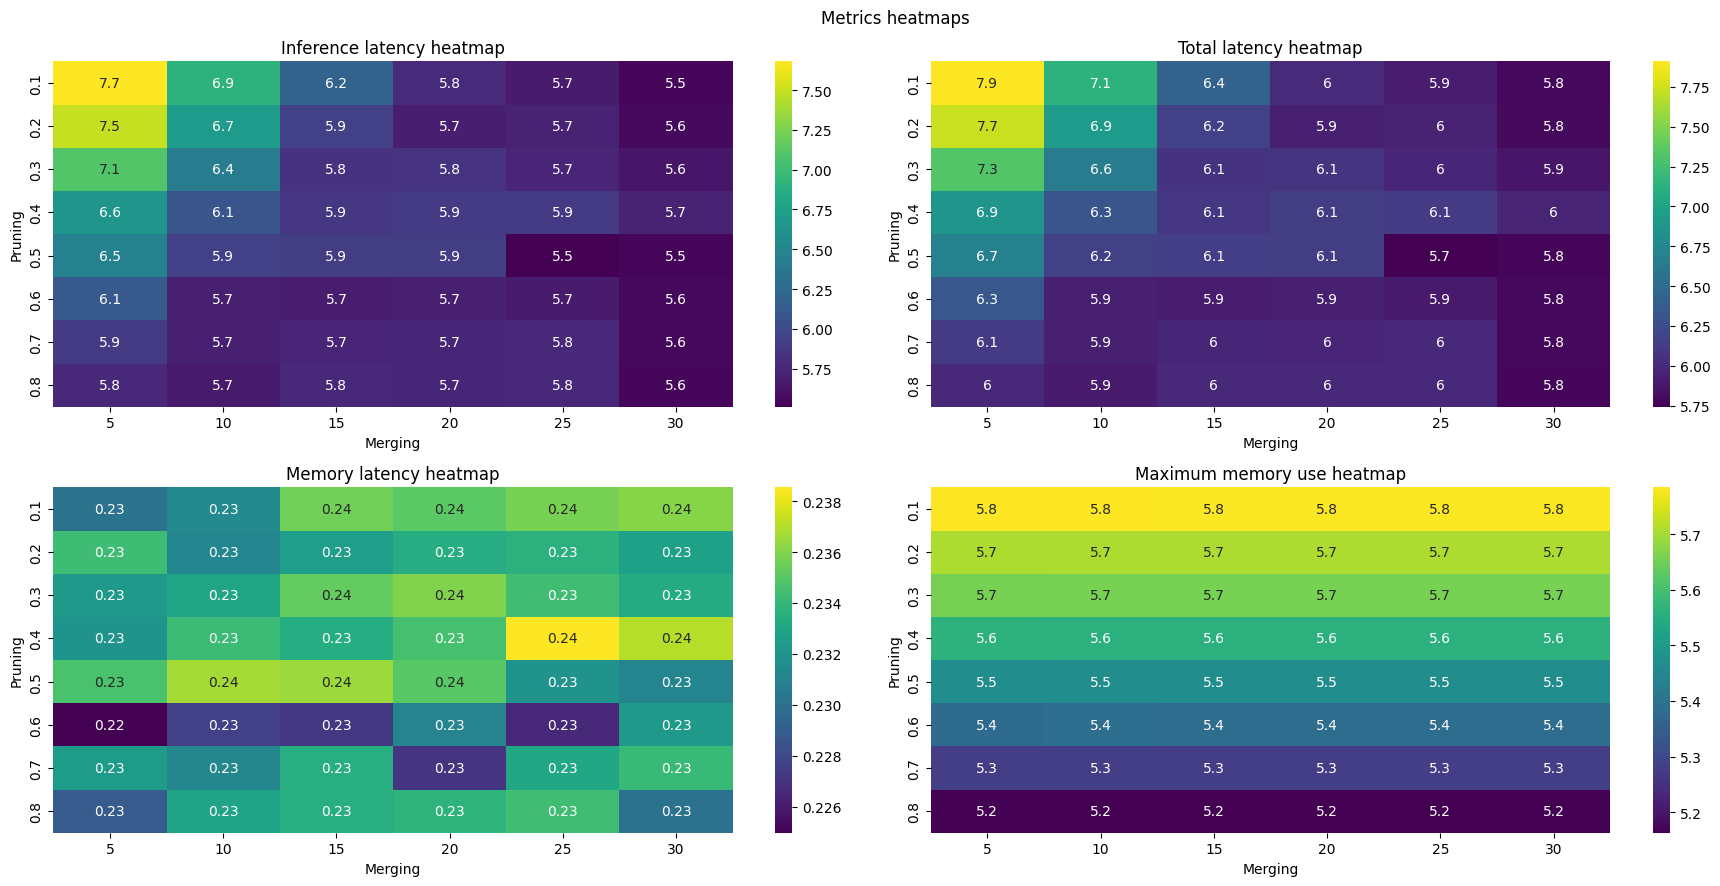

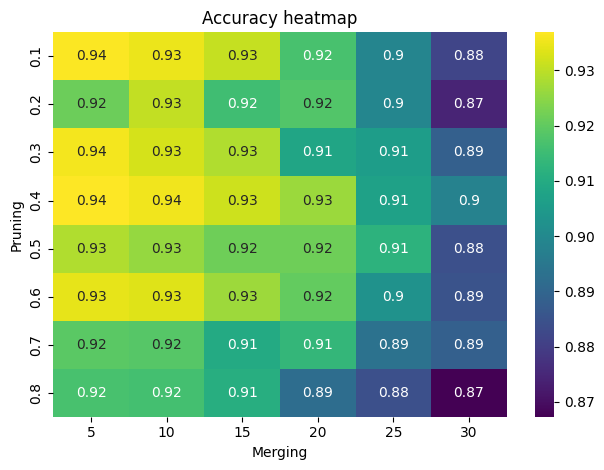

In [8]:
utils.plot_metrics_heat(combined, "Metrics heatmaps")

In [9]:
diff_latency = original_time - combined["Total Latency"]
diff_mem = original_mem - combined["Max Mem use"]
diff_acc = original_acc - combined["Accuracy"]

tradeoff_latency = (diff_latency/original_time)/(diff_acc/original_acc) * (combined["Accuracy"]**2)
tradeoff_mem = (diff_mem/original_mem)/(diff_acc/original_acc) * (combined["Accuracy"]**2)

combined["Values time"] = tradeoff_latency
combined["Values mem"] = tradeoff_mem

/tmp/ipykernel_11539/225011698.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined["Values time"] = tradeoff_latency
/tmp/ipykernel_11539/225011698.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined["Values mem"] = tradeoff_mem


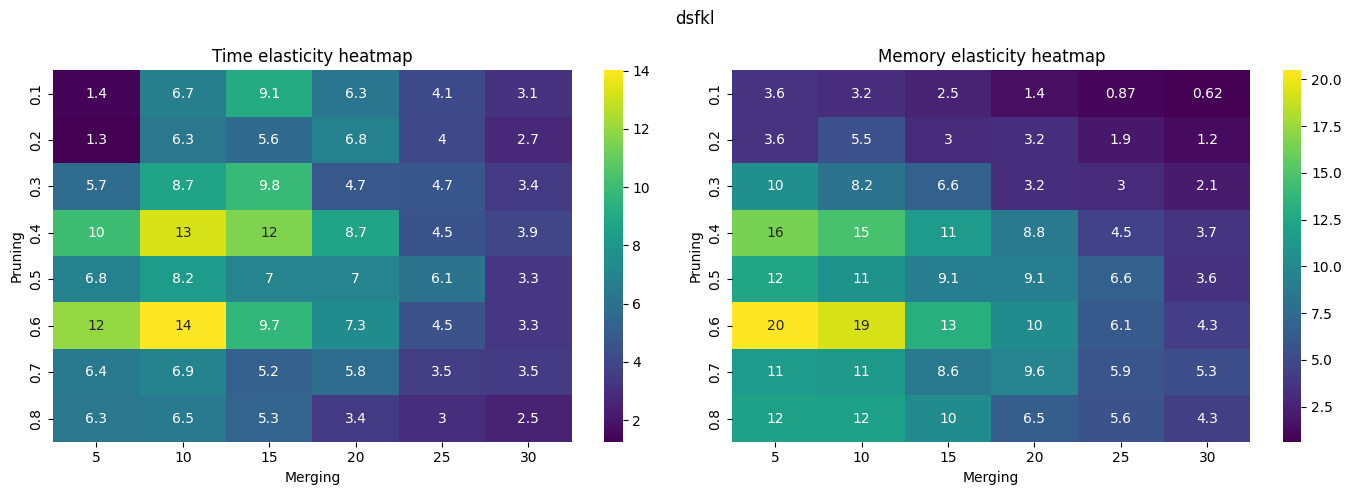

In [10]:
utils.plot_elasticities_heat(combined, "dsfkl")

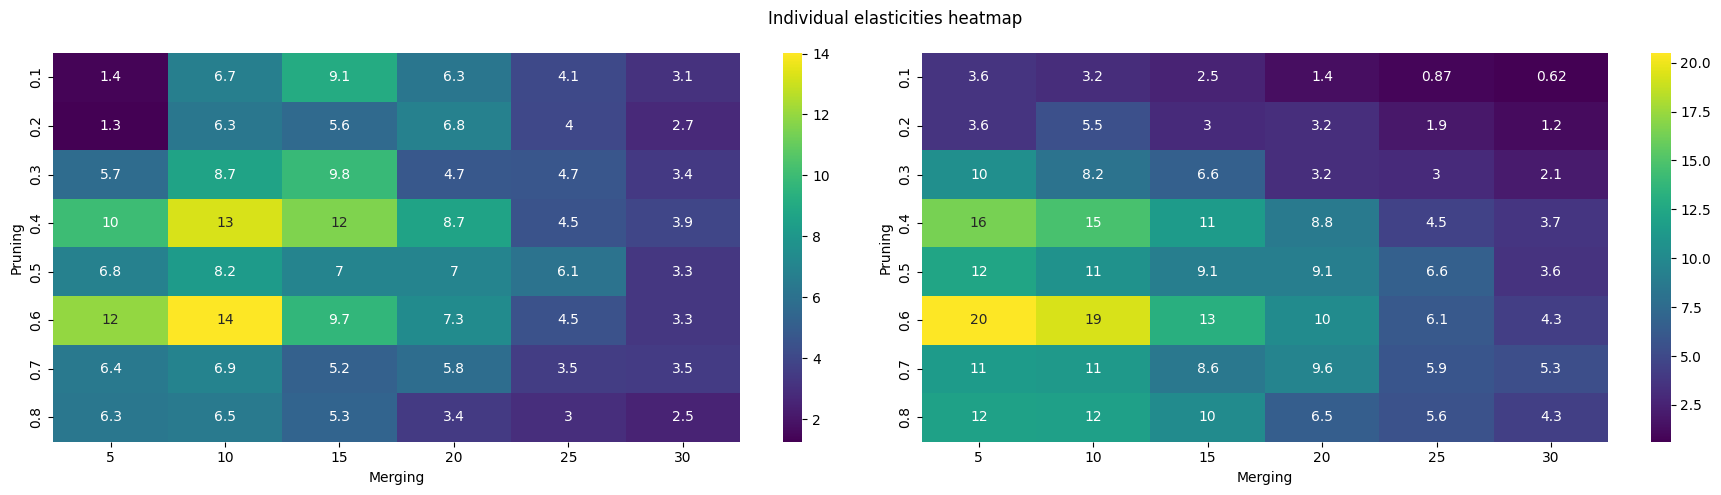

In [11]:
fig, axes = plt.subplots(1,2, figsize=(18, 5))
heat = combined.pivot(index="Pruning", columns="Merging", values="Values time")
sns.heatmap(heat, cmap='viridis', annot=True, ax=axes[0])

heat = combined.pivot(index="Pruning", columns="Merging", values="Values mem")
sns.heatmap(heat, cmap='viridis', annot=True, ax=axes[1])


fig.suptitle(f"Individual elasticities heatmap")
plt.tight_layout()
plt.savefig(f"summary/globalGraphs/Combine/{name}.png")
plt.show()

/tmp/ipykernel_11539/3773826930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined["Values average"] = (tradeoff_latency + tradeoff_mem)/2


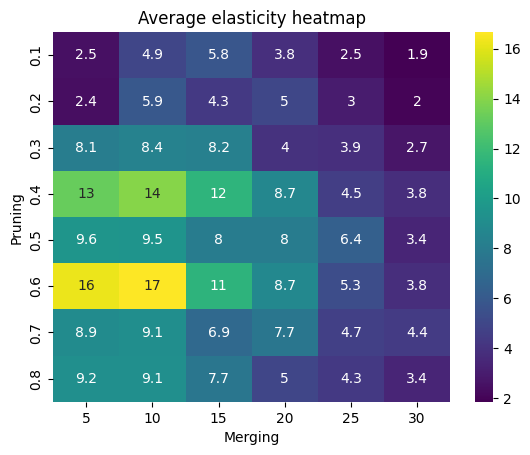

In [12]:
combined["Values average"] = (tradeoff_latency + tradeoff_mem)/2
heat = combined.pivot(index="Pruning", columns="Merging", values="Values average")
sns.heatmap(heat, cmap='viridis', annot=True)

plt.title(f"Average elasticity heatmap")
plt.savefig(f"summary/globalGraphs/Combine/{name}-Average.png")
plt.show()